<a href="https://colab.research.google.com/github/Coyote-Schmoyote/marketing-analysis-project/blob/main/marketing_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Marketing analysis project

## 1. Problem Definition

#### Problem 1 
Calculate the basic statistics (number of records, maximum value, minimum value, standard deviation, etc.) for numerical data (age, balance, day, duration, campaign, pdays, previous).


#### Problem 2
Calculate the number of people who apply for a deposit and the number of people who do not apply for a deposit for each of the data types: job, marital, education, default, housing, and loan.

#### Problem 3 
Construct a forecasting model with y (apply for deposit or not apply for deposit) as the objective variable. Try several models (logistic regression, SVM, decision tree, k-NN, random forest, etc.). However, please remove the data in advance for testing (set the traln test splt parameter to random_state=0). Then validate each model. Display the percentage of correct answers, goodness of fit, recall, F1 score, and confusion matrix for each model on the test data. 
 
#### Problem 4
For the model you selected in question 3, draw the ROC curve and calculate the AUC so that you can compare.

## 2. Data 
The data is downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/00222/. 

The dataset was donated in 2012, and is based on direct marketing campaigns via phone calls of a Portuguese banking institution. The classification goal of the dataset is to predict whether the client will subscript a term deposit. The dataset includes 45,211 entries.

## 3. Features

The data consists of the following features (attributes):
1. Age 
2. Job 
 *  admin.
 * blue-collar
  * entrepreneur
  * housemaid
  * management
  * retired
  * self-employed
  * services
  * student
  * technician
  * unemployed
  * unknown
3. Marital : marital status
  * divorced
  * married
  * single
  * unknown
4. Education 
 * basic.4y
 * basic.6y
 * basic.9y
 * high.school
 * illiterate
 * professional.course
 * university.degree
 * unknown
5. Default: has credit in default? 
 * no
 * yes
 * unknown
6. Housing: has housing loan? 
 * no
 * yes
 * unknown
7. Loan: has personal loan? 
 * no
 * yes
 * unknown
8. Contact: contact communication type
 * cellular
 * telephone
9. Month: last contact month of year

10. Day: last contact day of the week 

11. Duration: last contact duration, in seconds 
>Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. Campaign: number of contacts performed during this campaign and for this client
13. Pdays: number of days that passed by after the client was last contacted from a previous campaign 
>Note: 999 means client was not previously contacted
14. Previous: number of contacts performed before this campaign and for this client
15. Poutcome: outcome of the previous marketing campaign 
 * failure
 * nonexistent
 * success
16. Y - has the client subscribed a term deposit?
 * yes
 * no

## 4. Approach

First, we are going to conduct EDA (Exploratory Data Analysis) and descriptive statistics (Problem 1 and Problem 2). Second, we are going construct a classification model to predict whether the client will subscribe to the term deposit, based on the dataset features (Problem 3). Then, we are going to evaluate our models, and choose the best-perforoming one. For the best model, we are going to plot a ROC curve and AUC (Problem 4).







In [83]:
# Import the tools 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning models
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import auc, plot_roc_curve

## 1. EDA 

Desctiption of EDA

In [84]:
# import data
data = pd.read_csv("drive/MyDrive/ml-projects/marketing-analysis/data/bank-full.csv", sep=";")

In [85]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [86]:
# check dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [87]:
# check for missing values
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [88]:
# see the column names
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

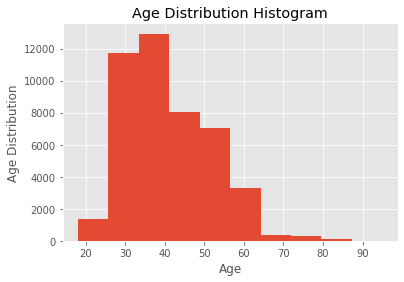

In [89]:
plt.style.use("ggplot")
plt.hist(data.age)
plt.xlabel("Age")
plt.ylabel("Age Distribution")
plt.title("Age Distribution Histogram")
plt.show();

In [97]:
data.job.values

array(['management', 'technician', 'entrepreneur', ..., 'retired',
       'blue-collar', 'entrepreneur'], dtype=object)

In [99]:
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

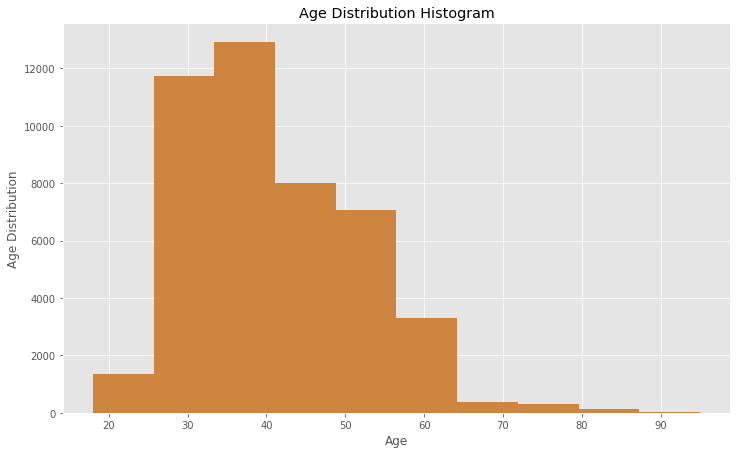

In [106]:
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.tight_layout()

#Age
ax1.hist(data["age"], color="peru")
ax1.set(title="Age Distribution Histogram",
        xlabel="Age",
        ylabel="Age Distribution");



## Descriptive statistics
More about descriptiv estatistics 

#### Problem 1 
Calculate the basic statistics (number of records, maximum value, minimum value, standard deviation, etc.) for numerical data (age, balance, day, duration, campaign, pdays, previous).

In [ ]:
print(f"Avg. age: {int(np.mean(data.age))} years old")
print(f"Avg. balance: {int(np.mean(data.balance))} eur")
print(f"Avg. day: {int(np.mean(data.day))}")
print(f"Avg. duraiton: {int(np.mean(data.duration))/60} min")
print(f"Avg. nr. of contacts with the client for the campaign: {int(np.mean(data.campaign))}")
print(f"Avg. time of last contact: {int(np.mean(data.pdays))} days ago")
print(f"Avg. nr. of contacts before the campaign: {int(np.mean(data.previous))}")

Avg. age: 40 years old
Avg. balance: 1362 eur
Avg. day: 15
Avg. duraiton: 4.3 min
Avg. nr. of contacts with the client for the campaign: 2
Avg. time of last contact: 40 days ago
Avg. nr. of contacts before the campaign: 0


In [ ]:
print(f"Min. age: {int(np.min(data.age))} years old")
print(f"Min. balance: {int(np.min(data.balance))} eur")
print(f"Min. day: {int(np.min(data.day))}")
print(f"Min. duraiton: {int(np.min(data.duration))/60} min")
print(f"Min. nr. of contacts with the client for the campaign: {int(np.min(data.campaign))}")
print(f"Min. time of last contact: {int(np.min(data.pdays))} days")
print(f"Min. nr. of contacts before the campaign: {int(np.min(data.previous))}")

Min. age: 18 years old
Min. balance: -8019 eur
Min. day: 1
Min. duraiton: 0.0 min
Min. nr. of contacts with the client for the campaign: 1
Min. time of last contact: -1 days
Min. nr. of contacts before the campaign: 0


In [ ]:
print(f"Max. age: {int(np.max(data.age))} years old")
print(f"Max. balance: {int(np.max(data.balance))} eur")
print(f"Max. day: {int(np.max(data.day))}")
print(f"Max. duraiton: {int((np.max(data.duration))/60)} min")
print(f"Max. nr. of contacts with the client for the campaign: {int(np.max(data.campaign))}")
print(f"Max. time of last contact: {int(np.max(data.pdays))} days")
print(f"Max. nr. of contacts before the campaign: {int(np.max(data.previous))}")

Max. age: 95 years old
Max. balance: 102127 eur
Max. day: 31
Max. duraiton: 81 min
Max. nr. of contacts with the client for the campaign: 63
Max. time of last contact: 871 days
Max. nr. of contacts before the campaign: 275
